In [17]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')
from text_recognizer.data.emnist_lines import EMNISTLines

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
dataset = EMNISTLines()
dataset.prepare_data()
dataset.setup()
print(dataset)
print('Mapping:', dataset.mapping)

2021-03-24 21:19:07.415 | INFO     | text_recognizer.data.emnist_lines:setup:106 - EMNISTLinesDataset loading data from HDF5...


/home/aktersnurra/projects/text-recognizer/data/processed/emnist_lines/ml_32_o0.000000_0.330000_ntr10000_ntv2000_nte2000.h5
EMNISTLines2 Dataset
Min overlap: 0.0
Max overlap: 0.33
Num classes: 83
Dims: (1, 56, 1024)
Output dims: (89, 1)
Train/val/test sizes: 10000, 2000, 2000
Batch x stats: (torch.Size([128, 1, 56, 1024]), torch.float32, tensor(0.), tensor(0.0136), tensor(0.0883), tensor(0.9984))
Batch y stats: (torch.Size([128, 89]), torch.int64, tensor(1), tensor(66))

Mapping: ['<b>', '<s>', '</s>', '<p>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '?']


In [19]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapping[i] for i in y])

In [20]:
y_example = dataset.data_train[0][1]
print(y_example, y_example.shape)
convert_y_label_to_string(y_example)

tensor([ 1, 45, 60, 53, 43, 58, 66, 42, 54, 52, 55, 51, 40, 48, 53, 48, 53, 46,
        66, 40, 41, 54, 60, 59,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3]) torch.Size([89])


'<s>funds complaining about</s><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p>'

<s>funds complaining about</s><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p>
<s>time locating a copy</s><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p>
<s>his prime source</s><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p>
<s>to</s><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p><p>
<s>to with</s><p><p><p><p><p><p><p><p><p><p><p

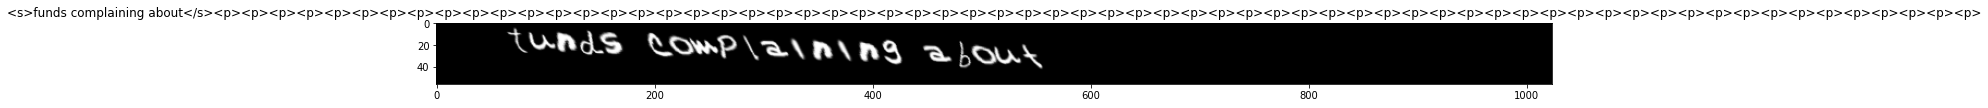

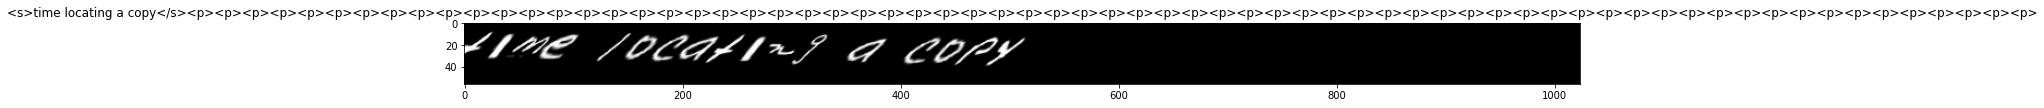

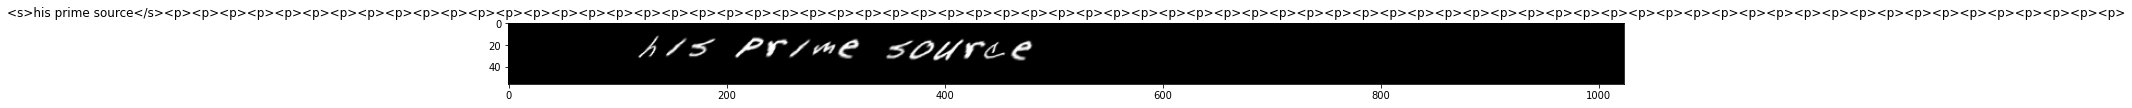

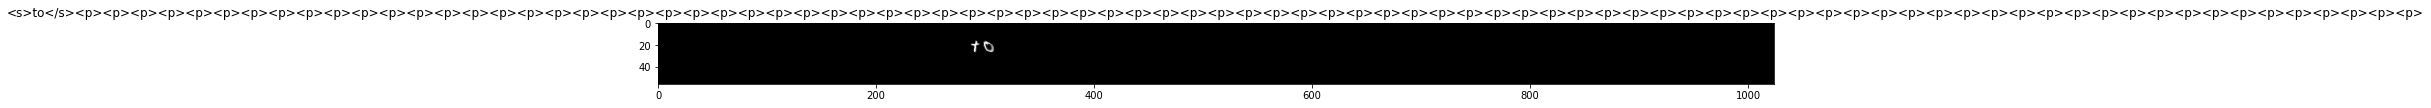

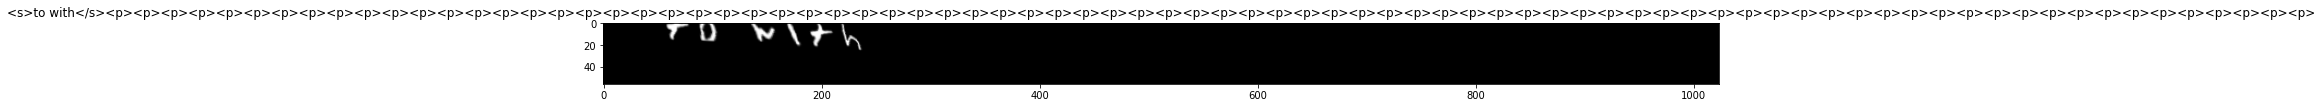

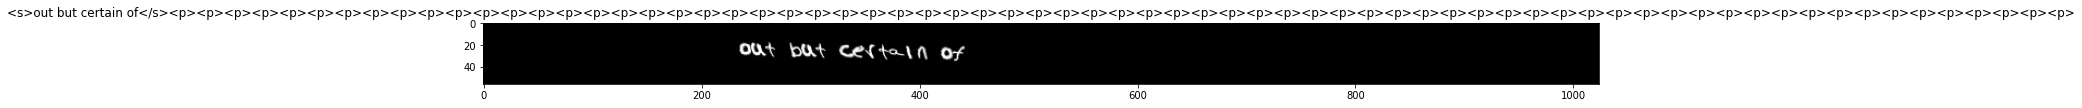

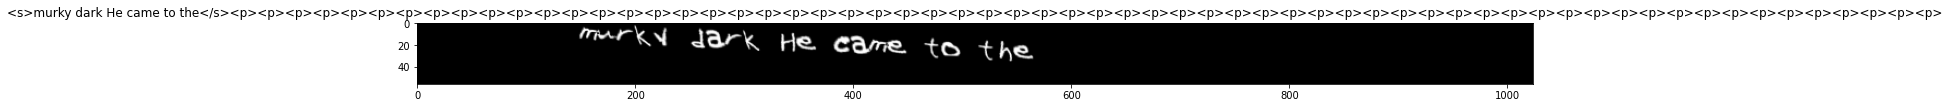

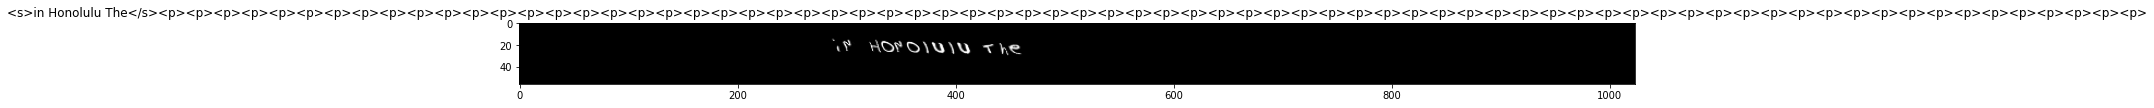

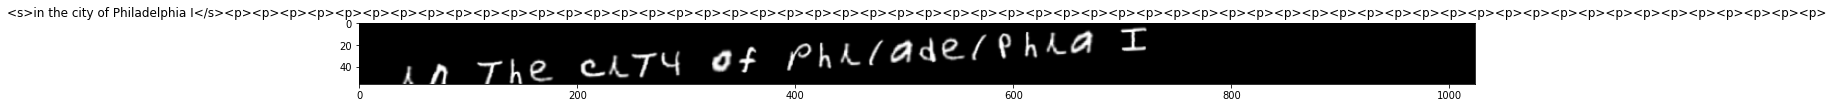

In [23]:
num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    x, y = dataset.data_train[i]
    sentence = convert_y_label_to_string(y) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(x.squeeze(), cmap='gray')